# Unity Sr Data Analyst Take-Home
-Qinya Wang

## 1. Load data
Import packages, load data from google drive and unzip

In [1]:
import gdown
import zipfile
import json
import pandas as pd

In [2]:
url = 'https://drive.google.com/u/0/uc?id=114f1iOqYWvgFgMx-QJZEsUEkq5HF84EA'
output = 'sample_data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=114f1iOqYWvgFgMx-QJZEsUEkq5HF84EA
To: /Users/qinyaw/sample_data.zip
100%|██████████████████████████████████████| 76.1M/76.1M [00:02<00:00, 32.0MB/s]


'sample_data.zip'

In [4]:
with zipfile.ZipFile("sample_data.zip","r") as zip_ref:
    zip_ref.extractall()

## 2. Import JSON file to Dataframe

- [pandas.read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html) was used to read JSON file into pandas DataFrame. 
- Drop duplicated rows
- Convert duration to minutes under the assumption that duration is measured in milliseconds
- Initially, [pandas.json_normalize](https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html) could be a better option to normalize the nested JSON in attribute "parameters". However, the parameter value is enclosed in quotes (see example below) which turned into a challenge as python recognizes it as String instead of JSON format. Given the time constraint (45-90min), I decided to leave the parameters column as is and try to do analysis based on that. With "parameters" normalized, it would enable us to extract/tramsform data much easier.

example record in data_zipped.json:

{\
   "submit_date":"2021-10-28",\
   "ID":"ZpjVQPcAbxtYmJrt1Y6yUVlTh2bl/8fAuF1Q0vGFnK0=",\
   "platform":"WindowsEditor",\
   "license":"Unity Personal",\
   "sessionid":"1739394527949573437",\
   "blocking":true,\
   "duration":"330352",\
   "parameters":"{\"sourceView\":\"UnityEditor.Toolbar\",\"delayDuration\":477588,\"loadScenesDuration\":1725795,\"updateSceneDuration\":598151}",\
   "start":"2021-10-28T18:53:16.4234599Z",\
   "subtype":"exitPlayMode",\
   "ts":"2021-10-28 18:53:16.754 UTC"\
}

In [139]:
df = pd.read_json('data_zipped.json', lines=True)
df = df.drop_duplicates()

In [140]:
df["duration_min"]= df["duration"]/60000

In [141]:
df.head()

,submit_date,ID,platform,sessionid,blocking,duration,parameters,start,subtype,ts,license,duration_min
0,2021-10-28,v4/lL/HKf7A4Sqlx13944zkrx+oapLs+npaw9OUTTd4=,WindowsEditor,5314110829103121408,True,122556.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T18:43:26.8774433Z,exitPlayMode,2021-10-28 18:43:27.169 UTC,NaN,2.042600
1,2021-10-28,yneAbGInS6RdkU+np9wOhJxEq4Xx8ThHdiA4c0sH1Dw=,WindowsEditor,6233676446368430080,True,489308.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:38:29.5106919Z,exitPlayMode,2021-10-28 19:38:30.189 UTC,NaN,8.155133
2,2021-10-28,M5EjWdG90VtOp7sszGIINlbCM62WeqsU8vCNzfDZUs0=,WindowsEditor,2681689864129693184,True,384588.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T19:04:48.6154116Z,exitPlayMode,2021-10-28 19:04:49.077 UTC,NaN,6.409800
3,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,155529.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:45:33.8444707Z,exitPlayMode,2021-10-28 21:45:34.009 UTC,NaN,2.592150
4,2021-10-28,8r87+Merm5DwsC8QaREoAGMpw4nThXoYZBgxROtfTtY=,WindowsEditor,1290270805231924736,True,113993.0,"{""sourceView"":""UnityEditor.Toolbar""}",2021-10-28T21:07:52.8860063Z,exitPlayMode,2021-10-28 21:07:53.694 UTC,NaN,1.899883


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993959 entries, 0 to 1000099
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   submit_date   993959 non-null  object 
 1   ID            971826 non-null  object 
 2   platform      993959 non-null  object 
 3   sessionid     993959 non-null  int64  
 4   blocking      993959 non-null  bool   
 5   duration      993816 non-null  float64
 6   parameters    993959 non-null  object 
 7   start         993959 non-null  object 
 8   subtype       993959 non-null  object 
 9   ts            993788 non-null  object 
 10  license       961222 non-null  object 
 11  duration_min  993816 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 91.9+ MB


## 3. Data Analysis
### How many Creators are using our Lighting tools?
- There were **75,756** creators using the tool.

### Other user insights
- Roughly **1/4** (19,589) of the of the creators were on Unity Pro license.
- The majority creators (68,442, around **90%**) were using Windows Platform.

In [143]:
df['ID'].nunique()

75756

In [120]:
df_lic = df.groupby(['license'])['ID'].nunique()
df_lic

license
Unity Personal    55112
Unity Pro         19589
Name: ID, dtype: int64

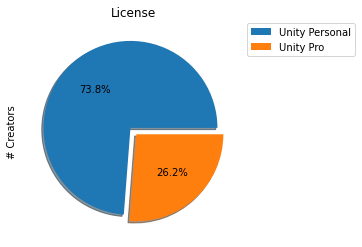

In [121]:
ax = df_lic.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], legend=True, title='License', ylabel='# Creators', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02))

In [122]:
df_plt = df.groupby(['platform'])['ID'].nunique()
df_plt

platform
LinuxEditor        440
OSXEditor         6874
WindowsEditor    68442
Name: ID, dtype: int64

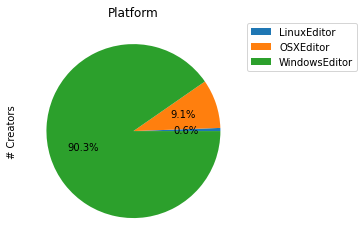

In [123]:
ax = df_plt.plot(kind="pie", autopct='%1.1f%%',legend=True, title='Platform', ylabel='# Creators', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02))

### How much time do they generally spend on our Lighting tools?

- On average, users spent aourng **1 hour** on a single session.
- However, the distribution of durtion was highly skewed(see below duration percentile and boxplot) that **75%** of sessions were completed within **1 hour**. the median of session duration was around **28 minutes**, which would be more appropriate to describe how long user generally spent on one session

In [135]:
# Average duration in minutes
df["duration_min"].mean()

65.96343263129194

In [136]:
# Median duration in minutes
df["duration_min"].median()

27.707825

In [137]:
# duration percentile in minutes, 75% percentile is 59 min
df["duration_min"].describe()

count    9.938160e+05
mean     6.596343e+01
std      1.479458e+03
min      8.050000e-03
25%      6.158838e+00
50%      2.770782e+01
75%      5.899332e+01
max      1.433558e+06
Name: duration, dtype: float64

<AxesSubplot: >

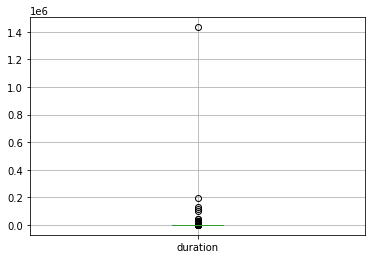

In [138]:
df.boxplot(column='duration_min')

### How many Creators use “bakeBackend”?
**15,004 (19.8%)** creators used “bakeBackend”.

In [128]:
bakeBackend = df[df['parameters'].str.contains("bakeBackend")]

In [129]:
bakeBackend['ID'].nunique()

15004

In [130]:
bakeBackend['ID'].nunique()/df['ID'].nunique()

0.19805691958392735

### Which version of “bakeBackend” is used the most?
- There were **23,621** enlighten sessions and **68,673** progressivecpu sessions.
- **progressivecpu** was used the most

In [131]:
bakeBackend[bakeBackend['parameters'].str.contains("enlighten")]['sessionid'].count()

23621

In [132]:
bakeBackend[bakeBackend['parameters'].str.contains("progressivecpu")]['sessionid'].count()

68673

## Next Steps
- Normalized the parameters column so that we can analyze each detailed parameter and gain more user insight
 - Remove the quotes around parameter field then parse it as JSON
 - Utilize other tools to read the data
- Utilize BI tool (Tableau/PowerBI, etc.) to visualize the data